In [5]:
# explode will take a column with list values and create a new row for each element in the list, replicating the other columns as needed. 
# This is useful for normalizing data that has multiple values in a single cell into a more tabular format.

import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Load the dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [7]:
df[['job_title_short', 'job_skills']].head(5)

,job_title_short,job_skills
0,Senior Data Engineer,NaN
1,Data Analyst,"[r, python, sql, nosql, power bi, tableau]"
2,Data Engineer,"[python, sql, c#, azure, airflow, dax, docker,..."
3,Data Engineer,"[python, c++, java, matlab, aws, tensorflow, k..."
4,Data Engineer,"[bash, python, oracle, aws, ansible, puppet, j..."


In [8]:
df_exploded = df.explode('job_skills')

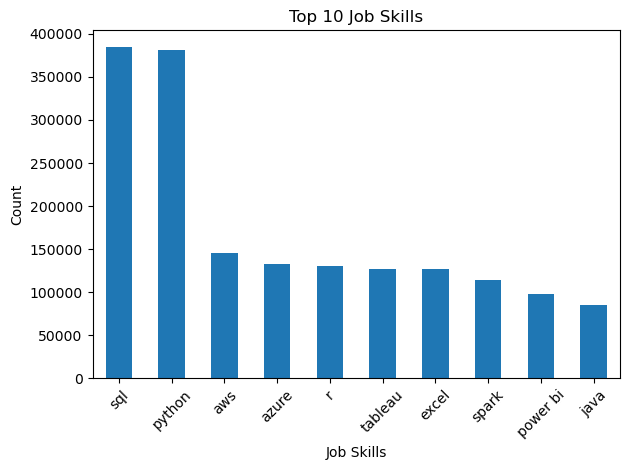

In [10]:
df_exploded['job_skills'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Job Skills')
plt.xlabel('Job Skills')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
skills_count = df_exploded.groupby(['job_title_short', 'job_skills']).size()

type(skills_count)

pandas.Series

In [16]:
df_skills_count = skills_count.reset_index(name='skill_count')

df_skills_count = df_skills_count.sort_values(by='skill_count', ascending=False)

df_skills_count

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
462,Data Analyst,chainer,1
432,Cloud Engineer,wrike,1
410,Cloud Engineer,theano,1
24,Business Analyst,chainer,1


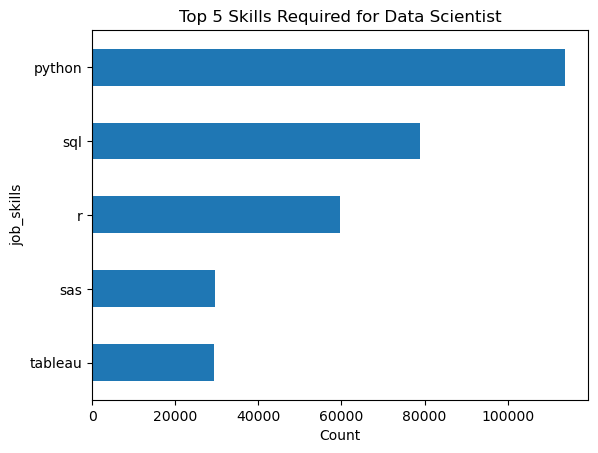

In [33]:
def countOfSkillsRequiredForJob(job_title, top_skills=10):
    return df_skills_count[df_skills_count['job_title_short'] == job_title].head(top_skills)

job_title = 'Data Scientist'
top_skills = 5
df_skill_final = countOfSkillsRequiredForJob(job_title, top_skills)
df_skill_final.plot(x='job_skills', y='skill_count', kind='barh')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count on top
plt.title(f'Top {top_skills} Skills Required for {job_title}')
plt.xlabel('Count')
plt.legend().set_visible(False)  # Hide legend since it's not needed
plt.show()
